<a href="https://colab.research.google.com/github/xumukkg/Base-A-to-Base-B/blob/master/victor_work_in_project%22Payment_Fraud_Class_Version%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1fhJ236fY1DvP_ak5SRhd4om2ttOX0ZxG' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1fhJ236fY1DvP_ak5SRhd4om2ttOX0ZxG" -O credit_card_fraud.csv && rm -rf /tmp/cookies.txt

--2023-08-24 11:48:29--  https://docs.google.com/uc?export=download&confirm=t&id=1fhJ236fY1DvP_ak5SRhd4om2ttOX0ZxG
Resolving docs.google.com (docs.google.com)... 74.125.126.138, 74.125.126.100, 74.125.126.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.126.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/77ud68n5vnpaetertl6j7ejo7n5fbuuj/1692877650000/16608975101254747244/*/1fhJ236fY1DvP_ak5SRhd4om2ttOX0ZxG?e=download&uuid=e2beaa5b-12bd-4f78-b7a8-2176f7ddf6a9 [following]
--2023-08-24 11:48:29--  https://doc-0k-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/77ud68n5vnpaetertl6j7ejo7n5fbuuj/1692877650000/16608975101254747244/*/1fhJ236fY1DvP_ak5SRhd4om2ttOX0ZxG?e=download&uuid=e2beaa5b-12bd-4f78-b7a8-2176f7ddf6a9
Resolving doc-0k-0s-docs.googleusercontent.com (doc-0k-0s-docs.googleusercontent.com)... 209.85.146.132, 

In [ ]:
import pandas as pd
df = pd.read_csv('credit_card_fraud.csv')


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [ ]:
### FINDING PATTENR
isfragulent =df.loc[df["isFraud"]==1]
isfragulent['oldbalanceOrg'].mean()
df.isnull()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

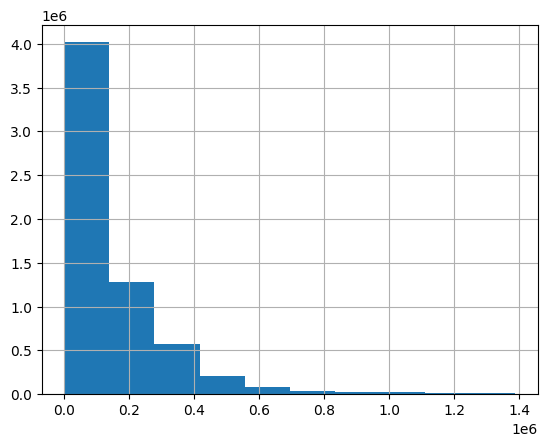

In [ ]:
### FINDING PATTENR
df.loc[df['amount'] < df['amount'].mean() + df['amount'].std()*2, 'amount'].hist()

In [ ]:
### FINDING PATTENR
# how many cases are fraudulent in our data?
c =len(df[df['isFraud']==1])

# df.loc[df['isFraud'] == 1]
#print(Isfraud =df.loc[df['isFraud']==1].value_counts())
#print(NOtIsfraud = df.loc[df['isFraud']==0].value_counts())
# showing that 8200 fraud amoung the 6 million of data.
#so it means that fraud/notsfraud so small
#summary we need rather try to fin goood precission and recall than accuracy
c


8213

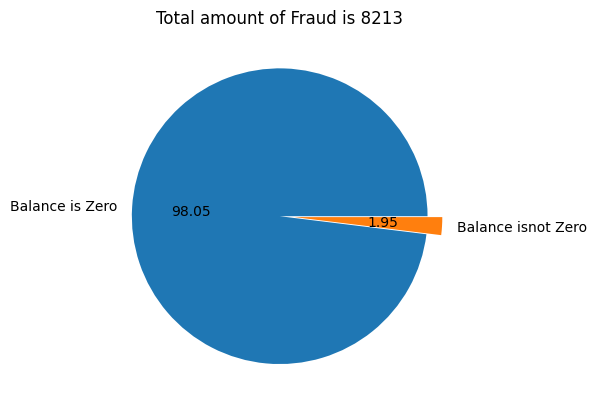

In [ ]:
### FINDING PATTENR
when_balance0 =df.loc[df['newbalanceOrig']==0]
e =len(df.loc[(df['newbalanceOrig']==0) & df['isFraud']==1])
d =len(df.loc[(df['newbalanceOrig']!=0) & df['isFraud']==1])
#when balance 0 we have 3609566 cases
#when balance 0 and Fraud =1 , we have 8053 cases

plt.title("Total amount of Fraud is 8213",
    color = "Black"
)
plt.pie(
    [e, d],
    labels =["Balance is Zero", "Balance isnot Zero"],
    textprops ={'color': 'black'},
    autopct ='%.2f',
    explode=(0, 0.1)
)
plt.show()

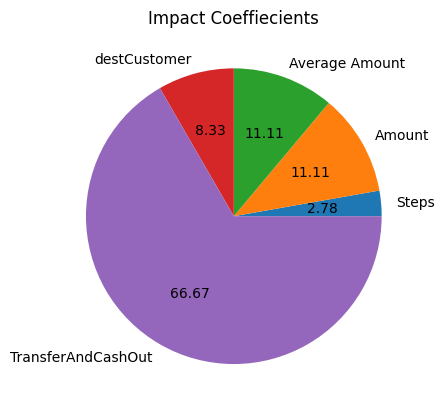

In [ ]:
#step, amount, aveamount, destcustomer, transferandcashout i just put random number. At end i will put the coeficient from logistic equation
step =5
amount =20
AveAmount = 20
destCustomer =15
TransferAndcashout=120
Cash_out =15
plt.title("Impact Coeffiecients", color = "Black")
plt.pie([step,amount, AveAmount, destCustomer, TransferAndcashout],
        labels =["Steps",'Amount','Average Amount', "destCustomer","TransferAndCashOut"],
        autopct ='%.2f')
plt.show()


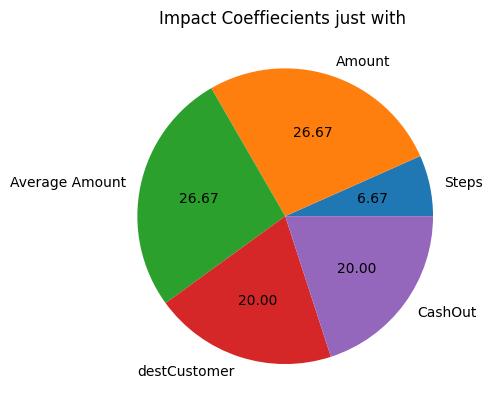

In [ ]:

step =5
amount =20
AveAmount = 20
destCustomer =15
TransferAndcashout=120
Cash_out =15
plt.title("Impact Coeffiecients just with ", color = "Black")
plt.pie([step,amount, AveAmount, destCustomer, Cash_out],
        labels =["Steps",'Amount','Average Amount', "destCustomer","CashOut"],
        autopct ='%.2f')
plt.show()

In [ ]:
### FINDING PATTENR
#when balance is Not 0 and fraud ==1 , we have 160 cases
when_balanceNot0_and_isFraud1=df[(df['isFraud']==1) & (df['newbalanceOrig']!=0)]

when_balanceNot0_and_isFraud1.loc[df['type']=='CASH_OUT']
#Note when balance is Not 0 and fraud ==1 , we have 1 case of "Cash_out"
when_balanceNot0_and_isFraud1.loc[df['type']=='TRANSFER']
#note when balance is Not 0 and fraud ==1, we have 159 cases of transfer


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4440,4,TRANSFER,10000000.00,C7162498,12930418.44,2930418.44,C945327594,0.00,0.00,1,0
60853,9,TRANSFER,994453.20,C1121789613,1437370.87,442917.67,C254839817,194812.76,665743.67,1,0
481250,19,TRANSFER,10000000.00,C416779475,11861008.32,1861008.32,C380259496,0.00,0.00,1,0
586311,33,TRANSFER,10000000.00,C1439740840,19887819.06,9887819.06,C875288652,0.00,0.00,1,0
1030559,72,TRANSFER,10000000.00,C53057884,18594065.09,8594065.09,C588547519,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362576,741,TRANSFER,10000000.00,C780743034,45674547.89,35674547.89,C491519946,0.00,0.00,1,0
6362578,741,TRANSFER,10000000.00,C1111699947,35674547.89,25674547.89,C949015157,0.00,0.00,1,0
6362580,741,TRANSFER,10000000.00,C88849251,25674547.89,15674547.89,C1939028448,0.00,0.00,1,0
6362582,741,TRANSFER,10000000.00,C1945606464,15674547.89,5674547.89,C625944676,0.00,0.00,1,0


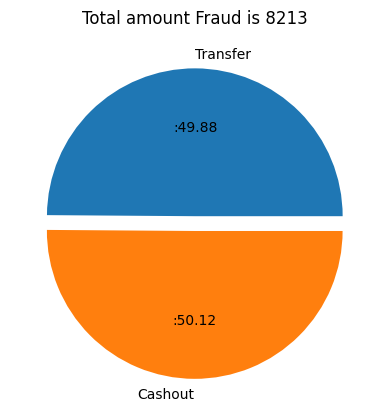

In [ ]:
#When transfer and isfraud ==1, we have 4097 cases
#WHEN cash_out and isfraud ==1, we have 4116 cases
a =len(df.loc[(df['isFraud']==1) & (df['type']=='TRANSFER')])
b = len(df.loc[(df['isFraud']==1) & (df['type']=='CASH_OUT')])
plt.title("Total amount Fraud is 8213",
    color = "Black"
)
plt.pie(
    [a, b],
    labels =["Transfer", "Cashout"],
    textprops ={'color': "Black"},
    autopct =':%.2f',
    explode=(0, 0.1)
)
plt.show()

([<matplotlib.patches.Wedge at 0x7cf769530850>,
 [Text(-1.099990955625572, 0.004460666087110192, 'Transactions'),
  Text(1.199990133749636, -0.004866097361422307, 'Fraudulent transactions')],
 [Text(-0.5999950667048575, 0.002433090592969195, '99.87'),
  Text(0.6999942446872877, -0.0028385567941630117, '0.13')])

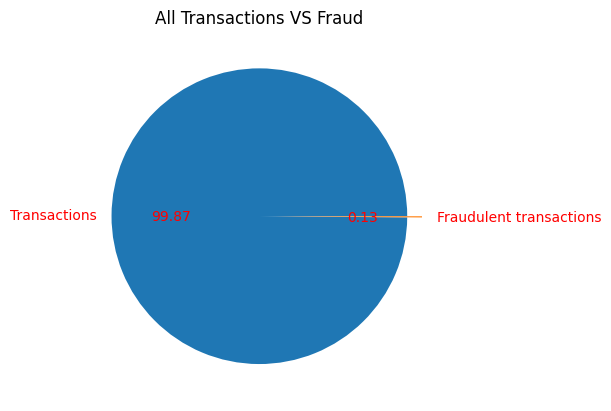

In [ ]:
a =len(df.loc[(df['isFraud']!=1)])
b = len(df.loc[(df['isFraud']==1)])
plt.title("All Transactions VS Fraud",
    color = "Black"
)
plt.pie(
    [a, b],
    labels =["Transactions", "Fraudulent transactions"],
    textprops ={'color': 'red'},
    autopct ='%.2f',
    explode=(0, 0.1)
)


this is case of "Canser Detection"
so accuracy may be so high
so it is more preferable focus on recall and precision

In [ ]:
# have a column for amounts less than mean and amounts greater than mean

mean = df['amount'].mean()
df['amount_less_than_mean'] = df['amount'].apply(lambda x: 1 if x < mean else 0)
df['amount_greater_than_mean'] = df['amount'].apply(lambda x: 1 if x > mean else 0)

In [ ]:
#clearing not useful data
df.loc[(df['isFraud'] == 1) & (df['type'] == 'DEBIT')]
df.loc[(df['isFraud'] == 1) & (df['type'] == 'CASH_IN')]
df.loc[(df['isFraud'] == 1) & (df['type'] == 'CASH_OUT')]
df.loc[(df['isFraud'] == 1) & (df['type'] == 'TRANSFER')]
df.loc[(df['isFraud'] == 1) & (df['type'] == 'PAYMENT')]
# result is cash_out and transfer are the two fraudulent data types

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_less_than_mean,amount_greater_than_mean


In [ ]:
mean = df['amount'].mean()
df['amount_less_than_mean'] = df['amount'].apply(lambda x: 1 if x < mean else 0)
df['amount_greater_than_mean'] = df['amount'].apply(lambda x: 1 if x > mean else 0)

In [ ]:
# add a column to detect if the origin transaction was a customer or a merchant
df['origIsCustomer'] = df['nameOrig'].apply(lambda x: 1 if x.startswith('C') else 0)
df['origIsMerchant'] = df['nameOrig'].apply(lambda x: 1 if x.startswith('M') else 0)
df['destIsCustomer'] = df['nameDest'].apply(lambda x: 1 if x.startswith('C') else 0)
df['destIsMerchant'] = df['nameDest'].apply(lambda x: 1 if x.startswith('M') else 0)

In [ ]:
# onehot encode types
one_hot_encoded = pd.get_dummies(df['type'])
df = pd.concat([df, one_hot_encoded], axis=1)

In [ ]:
fraudulent_users = df[df['isFraud'] == 1]['nameOrig'].unique()
non_fraudulent_df = df[df['isFraud'] == 0]
users_in_non_fraud = non_fraudulent_df[non_fraudulent_df['nameOrig'].isin(fraudulent_users)]
print("Users involved in both fraudulent and non-fraudulent transactions:")
print(users_in_non_fraud['nameOrig'].unique())



Users involved in both fraudulent and non-fraudulent transactions:
['C1498185758' 'C803411135' 'C1044518032' 'C1885333477' 'C1882162040'
 'C1191696703' 'C1127304441' 'C171834973' 'C876181265' 'C471097879'
 'C483009518' 'C2004363483' 'C1015856166' 'C357911107' 'C850961884'
 'C1851065642' 'C812001868' 'C1899367925' 'C570470570' 'C686187434'
 'C929585215' 'C10982843' 'C1118399210' 'C1863683348' 'C431038121'
 'C1627918307' 'C635739031' 'C432562518']


<Axes: >

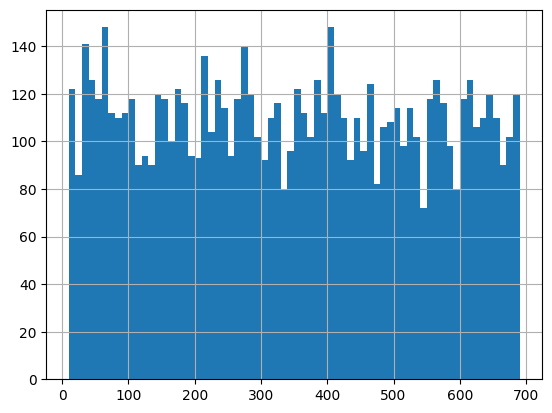

In [ ]:
df[df['isFraud'] == 1]['step'].hist(bins=[10 * i for i in range(1, 70)])

<Axes: >

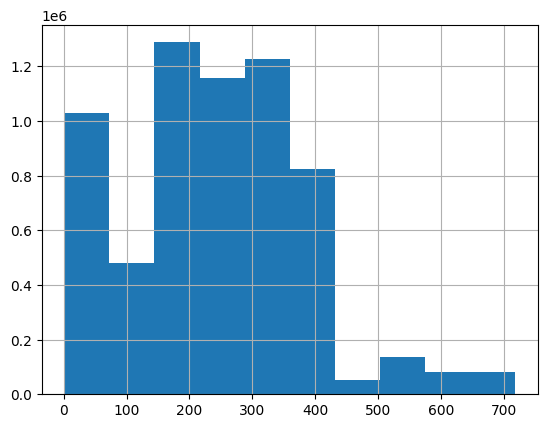

In [ ]:
df[df['isFraud'] == 0]['step'].hist()

In [ ]:
# add a new column if a customer has a fraudulent transaction and at least 2 transactions in that step
df['hasAFraudulentTransaction'] = df.apply(lambda x: 1 if x['isFraud'] == 1 and x['step'] > 1 else 0, axis=1)

In [ ]:
df['TransferAndCashOutSameStep'] = 0

transfer_mask = df['type'] == 'TRANSFER'
cash_out_mask = df['type'] == 'CASH_OUT'
matching_cash_out_indices = (
    transfer_mask &
    cash_out_mask.shift(-1) &
    (df['step'] == df['step'].shift(-1)) &
    (df['amount'] == df['amount'].shift(-1))
)

matching_transfer_indices = (
    cash_out_mask &
    transfer_mask.shift(1) &
    (df['step'] == df['step'].shift(1)) &
    (df['amount'] == df['amount'].shift(1))
)

# Update the 'TransferAndCashOutSameStep' column
df.loc[matching_cash_out_indices, 'TransferAndCashOutSameStep'] = 1
df.loc[matching_transfer_indices, 'TransferAndCashOutSameStep'] = 1

In [ ]:
matching_cash_out_indices

,step,amount,nameOrig,nameDest,isFraud,amount_less_than_mean,amount_greater_than_mean,origIsCustomer,origIsMerchant,destIsCustomer,destIsMerchant,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,hasAFraudulentTransaction,TransferAndCashOutSameStep
0,1,9839.64,C1231006815,M1979787155,0,1,0,1,0,0,1,0,0,0,1,0,0,0
1,1,1864.28,C1666544295,M2044282225,0,1,0,1,0,0,1,0,0,0,1,0,0,0
2,1,181.00,C1305486145,C553264065,1,1,0,1,0,1,0,0,0,0,0,1,0,1
3,1,181.00,C840083671,C38997010,1,1,0,1,0,1,0,0,1,0,0,0,0,1
4,1,11668.14,C2048537720,M1230701703,0,1,0,1,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,C776919290,1,0,1,1,0,1,0,0,1,0,0,0,1,1
6362616,743,6311409.28,C1529008245,C1881841831,1,0,1,1,0,1,0,0,0,0,0,1,1,1
6362617,743,6311409.28,C1162922333,C1365125890,1,0,1,1,0,1,0,0,1,0,0,0,1,1
6362618,743,850002.52,C1685995037,C2080388513,1,0,1,1,0,1,0,0,0,0,0,1,1,1


In [ ]:
df = df.drop(["type", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFlaggedFraud"], axis=1)

KeyError: ignored

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
independent_variables = ['step', 'amount', 'amount_greater_than_mean', 'destIsCustomer', 'TransferAndCashOutSameStep'] # CASH_OUT', 'TRANSFER hasAFraudulentTransaction, 'TransferAndCashOutSameStep']


In [ ]:
X = df[independent_variables]
y = df['isFraud'].values

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_less_than_mean,amount_greater_than_mean,Transfer,Cash_Out
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,1,0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1,0,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,1,0,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1,0,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0,1,0,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,1,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0,1,0,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,1,1,0


In [ ]:
# split data 80-20 for train-test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)



In [ ]:
# Calculate confusion matrix for the model
y_pred = model.predict(X_test)

confusion_matrix(y_test, y_pred)

In [ ]:
# Accuracy, precision, and recall are calculated from values in the confusion matrix
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

accuracy = (TP + TN) / (TP + FN + FP + TN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
if precision + recall == 0:
  print("precision + recall is 0")
f1 = 2 * (precision * recall) / (precision + recall)
print(accuracy, precision, recall, f1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC:  0.8507601579967992


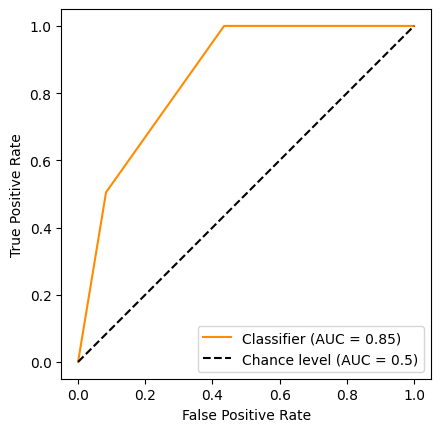

In [ ]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score
print('AUC: ', roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

RocCurveDisplay.from_predictions(
    y_test,
    clf.predict_proba(X_test)[:, 1],
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Business Questions:

    What makes a transaction fradulent?
      when we have combination of tranfer/cash_out
    What are the most common cases of fraud?
      ex; 96 % is transfer
    Are there specific customers/agents responsible for fraudulent transactions?

Hypotheses/Findings:

    amount of transaction > 1 million - it's fraud
    if the type is cash out and name_orig/dest is different - fraud
    is whole amount is used - fraud
    transfer and cash_out in same step with the same amount - fraud
    fraud occurs on customer accounts not merchant accounts



# Business Questions:
* What makes a transaction fradulent?
* What are the most common cases of fraud?
* Are there specific customers/agents responsible for fraudulent transactions?
*
